<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:
- **TASK 1:** Mark all launch sites on a map
- **TASK 2:** Mark the success/failed launches for each site on the map
- **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [2]:
!pip3 install folium
!pip3 install wget

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ------------------------- ------------- 71.7/108.4 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 900.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=d644152d2ffc4f5abca9442d4b44da82bc1d571d773b104b76dd00e9b823adbb
  Stored in directory: c:\users\dedof\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import folium
import wget
import pandas as pd

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site. 


In [4]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

Now, you can take a look at what are the coordinates for each site.


In [5]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [6]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [8]:
import folium
from folium.features import DivIcon

# Define the coordinates for NASA Johnson Space Center
nasa_coordinate = [29.5593, -95.0897]

# Create a map centered around NASA Johnson Space Center
site_map = folium.Map(location=nasa_coordinate, zoom_start=15)

# Create an orange circle at NASA Johnson Space Center's coordinate
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))

# Create a blue circle at NASA Johnson Space Center's coordinate with an icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
    )
)

# Add the circle and the marker to the map
site_map.add_child(circle)
site_map.add_child(marker)

# Display the map


We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example, 


In [9]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle. 


Now, let's add a circle for each launch site in data frame `launch_sites`


_TODO:_  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [10]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:
- Are all launch sites in proximity to the Equator line?
- Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [11]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. 
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


In [13]:
import folium
from folium.plugins import MarkerCluster

# Crea un mapa
mapa = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Crea un MarkerCluster
marker_cluster = MarkerCluster().add_to(mapa)

# Añade marcadores al cluster
for lat, lon in [[45.5236, -122.6750], [45.5234, -122.6752], [45.5232, -122.6754]]:
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

# Muestra el mapa
mapa.save('mapa_con_cluster.html')


Let's first create a `MarkerCluster` object


In [14]:
marker_cluster = MarkerCluster()


_TODO:_ Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [15]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red


In [16]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


_TODO:_ For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [17]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [19]:
import folium
from folium.plugins import MousePosition

# Crear un mapa
site_map = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

# Añadir Mouse Position para obtener las coordenadas (Lat, Long) al pasar el ratón sobre el mapa
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=5,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)

# Guardar el mapa en un archivo HTML
site_map.save('mapa_con_mouse_position.html')


In [20]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [21]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

_TODO:_ Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [ ]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

_TODO:_ After obtained its coordinate, create a `folium.Marker` to show the distance


In [22]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

_TODO:_ Draw a `PolyLine` between a launch site to the selected coastline point


In [ ]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


_TODO:_ Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [ ]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:
- Are launch sites in close proximity to railways?
- Are launch sites in close proximity to highways?
- Are launch sites in close proximity to coastline?
- Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2021-05-26|1.0|Yan|Created the initial version|


Copyright © 2021 IBM Corporation. All rights reserved.


In [23]:
import wget
import pandas as pd

# Descargar el archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_csv_file = wget.download(url)

# Leer el archivo CSV usando pandas
spacex_df = pd.read_csv(spacex_csv_file)

# Mostrar las primeras filas del DataFrame para verificar
print(spacex_df.head())


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

In [24]:
import folium

# Crear un mapa centrado en un punto específico
mapa = folium.Map(location=[30, -100], zoom_start=4)

# Añadir marcadores para cada sitio de lanzamiento
launch_sites = spacex_df[['Launch Site', 'Lat', 'Long']].drop_duplicates()

for index, site in launch_sites.iterrows():
    folium.Marker(
        location=[site['Lat'], site['Long']],
        popup=site['Launch Site'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_sites_map.html')


In [25]:
for index, row in spacex_df.iterrows():
    color = 'green' if row['class'] == 1 else 'red'  # Verde para éxito, rojo para fracaso
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_success_failure_map.html')


In [26]:
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

launch_sites = launch_sites['Launch Site'].unique()

app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in launch_sites],
        value=launch_sites[0]
    ),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=100,
        marks={i: str(i) for i in range(0, 10001, 1000)},
        value=[0, 10000]
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='payload-outcome-scatter')
])

@app.callback(
    Output('success-pie-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_pie_chart(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    success_counts = filtered_data['class'].value_counts()
    fig = px.pie(
        values=success_counts.values,
        names=success_counts.index,
        title=f'Success vs Failed Launches for {site}'
    )
    return fig

@app.callback(
    Output('payload-outcome-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    fig = px.scatter(
        filtered_data,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        title=f'Payload vs. Outcome for {site}'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[26], line 58, in update_scatter_plot(
    site='CCAFS LC-40',
    payload_range=[0, 10000]
)
     47 @app.callback(
     48     Output('payload-outcome-scatter', 'figure'),
     49     [Input('site-dropdown', 'value'),
     50      Input('payload-slider', 'value')]
     51 )
     52 def update_scatter_plot(site, payload_range):
     53     filtered_data = spacex_df[
     54         (spacex_df['Launch Site'] == site) &
     55         (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
     56         (spacex_df['Payload Mass (kg)'] <= payload_range[1])
     57     ]
---> 58     fig = px.scatter(
        px = <module 'plotly.express' from 'c:\\Users\\dedof\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\plotly\\express\\__init__.py'>
        filtered_data =     Flight Number        Date Time (UTC) Booster Ver

In [27]:
import wget
import pandas as pd

# Descargar el archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_csv_file = wget.download(url)

# Leer el archivo CSV usando pandas
spacex_df = pd.read_csv(spacex_csv_file)

# Verificar las primeras filas del DataFrame
print(spacex_df.head())


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (

In [28]:
import folium

# Crear un mapa centrado en un punto específico
mapa = folium.Map(location=[30, -100], zoom_start=4)

# Añadir marcadores para cada sitio de lanzamiento
launch_sites = spacex_df[['Launch Site', 'Lat', 'Long']].drop_duplicates()

for index, site in launch_sites.iterrows():
    folium.Marker(
        location=[site['Lat'], site['Long']],
        popup=site['Launch Site'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_sites_map.html')
# 

In [29]:
for index, row in spacex_df.iterrows():
    color = 'green' if row['class'] == 1 else 'red'  # Verde para éxito, rojo para fracaso
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('launch_success_failure_map.html')


In [30]:
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

launch_sites = launch_sites['Launch Site'].unique()

app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in launch_sites],
        value=launch_sites[0]
    ),
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=100,
        marks={i: str(i) for i in range(0, 10001, 1000)},
        value=[0, 10000]
    ),
    dcc.Graph(id='success-pie-chart'),
    dcc.Graph(id='payload-outcome-scatter')
])

@app.callback(
    Output('success-pie-chart', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_pie_chart(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    success_counts = filtered_data['class'].value_counts()
    fig = px.pie(
        values=success_counts.values,
        names=success_counts.index,
        title=f'Success vs Failed Launches for {site}'
    )
    return fig

@app.callback(
    Output('payload-outcome-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = spacex_df[
        (spacex_df['Launch Site'] == site) &
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]
    
    # Verificar si la columna 'Booster Version Category' existe, si no, crearla para evitar errores
    if 'Booster Version Category' not in filtered_data.columns:
        filtered_data['Booster Version Category'] = 'Unknown'
    
    fig = px.scatter(
        filtered_data,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        title=f'Payload vs. Outcome for {site}'
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\dedof\AppData\Local\Temp\ipykernel_39176\927445045.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dedof\AppData\Local\Temp\ipykernel_39176\927445045.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
!pip install numpy pandas seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


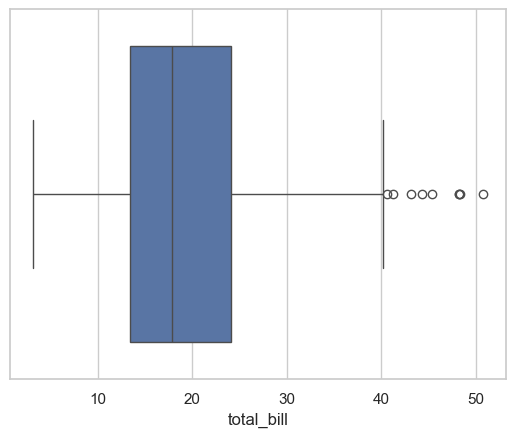

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


In [35]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


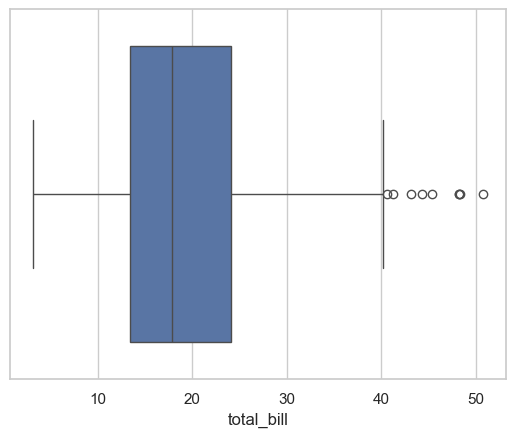

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


[1 2 3 4 5]
   column1  column2
0        1        5
1        2        6
2        3        7
3        4        8


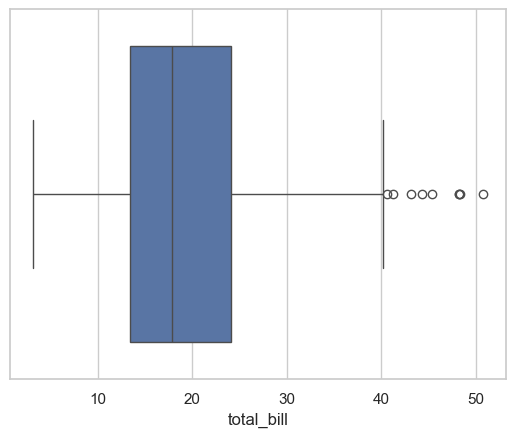

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

# Ejemplo de uso de numpy
array = np.array([1, 2, 3, 4, 5])
print(array)

# Ejemplo de uso de pandas
data = {'column1': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]}
df = pd.DataFrame(data)
print(df)

# Ejemplo de uso de seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])


In [39]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [40]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [41]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

ModuleNotFoundError: No module named 'js'

In [42]:
!pip install requests pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import requests
import pandas as pd

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


NameError: name 'io' is not defined

In [44]:
!pip install requests pandas



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [46]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [47]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [48]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

ModuleNotFoundError: No module named 'js'

In [49]:
!pip install requests pandas



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [51]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [52]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

NameError: name 'fetch' is not defined

In [53]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())


   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

In [54]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar las primeras filas del DataFrame para verificar
print(data.head())

# Crear un array de NumPy a partir de la columna 'Class'
Y = data['Class'].to_numpy()

# Verificar el contenido de Y
print(Y)


   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

KeyError: 'Class'

In [55]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [56]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear un array de NumPy a partir de la columna 'class' (ajustar el nombre según corresponda)
Y = data['class'].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'class'

In [57]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Ajuste según el nombre exacto de la columna que obtuviste
# Crear un array de NumPy a partir de la columna con el nombre exacto
Y = data['Class '].to_numpy()  # Ajusta 'Class ' al nombre correcto

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class '

In [58]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Usar el nombre exacto de la columna 'Class' (asegúrate de que sea el nombre correcto)
column_name = 'Class'  # Ajusta esto según la salida de print(data.columns)

# Crear un array de NumPy a partir de la columna con el nombre exacto
Y = data[column_name].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class'

In [59]:
# Limpiar los nombres de las columnas
data.columns = data.columns.str.strip()

# Verificar nuevamente los nombres de las columnas
print(data.columns)

# Usar el nombre exacto de la columna 'Class'
column_name = 'Class'  # Ajusta esto según la salida de print(data.columns)
Y = data[column_name].to_numpy()

# Verificar el contenido de Y
print(Y)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

KeyError: 'Class'

In [60]:
from sklearn.preprocessing import StandardScaler

# Supongamos que tus datos están en un DataFrame llamado data y que las características están en una variable X
X = data.drop(columns=['Class'])  # Excluye la columna objetivo
Y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KeyError: "['Class'] not found in axis"

In [61]:
import requests
import pandas as pd
import io

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [62]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Asumir que 'PayloadMass' es la columna objetivo
column_name = 'PayloadMass'  # Ajusta esto según la columna correcta

# Crear las variables X e Y
X = data.drop(columns=[column_name])  # Excluye la columna objetivo
Y = data[column_name]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "c:\Users\dedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [63]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Usar 'PayloadMass' como la columna objetivo
column_name = 'PayloadMass'  # Ajusta esto según la columna correcta

# Crear las variables X e Y
X = data.drop(columns=[column_name])  # Excluye la columna objetivo
Y = data[column_name]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio del modelo en los datos de prueba
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio del modelo en datos de prueba: {mse}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [64]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear una variable objetivo binaria
data['Target'] = (data['PayloadMass'] > 5000).astype(int)

# Crear las variables X e Y
X = data.drop(columns=['PayloadMass', 'Target'])  # Excluye la columna objetivo original y la nueva
Y = data['Target']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [65]:
import requests
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# URL del archivo CSV
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud fue exitosa

# Leer el contenido del CSV en un DataFrame de pandas
csv_data = response.content.decode('utf-8')
data = pd.read_csv(io.StringIO(csv_data))

# Mostrar los nombres de las columnas para verificar
print(data.columns)

# Crear una variable objetivo binaria
data['Target'] = (data['PayloadMass'] > 5000).astype(int)

# Crear las variables X e Y
X = data.drop(columns=['PayloadMass', 'Target'])  # Excluye la columna objetivo original y la nueva
Y = data['Target']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Encontrar los mejores hiperparámetros para RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Precisión del modelo en datos de prueba: {accuracy}")


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

In [66]:
num_records_test_sample = X_test.shape[0]
print(f"Number of records in the test sample: {num_records_test_sample}")


Number of records in the test sample: 18


In [67]:
from sklearn.svm import SVC

param_grid_svc = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train, Y_train)

best_kernel = grid_search_svc.best_params_['kernel']
print(f"Best kernel for SVM: {best_kernel}")


Best kernel for SVM: sigmoid


In [68]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, Y_train)

best_model_dt = grid_search_dt.best_estimator_
Y_pred_dt = best_model_dt.predict(X_test)

accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy of the best Decision Tree model on test data: {accuracy_dt * 100:.2f}%")


Accuracy of the best Decision Tree model on test data: 66.67%


In [2]:
!pip install python-pptx


   ---------------------------------------- 0.0/471.6 kB ? eta -:--:--
    --------------------------------------- 10.2/471.6 kB ? eta -:--:--
   ------- -------------------------------- 92.2/471.6 kB 1.0 MB/s eta 0:00:01
   --------------- ------------------------ 184.3/471.6 kB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 266.2/471.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 471.6/471.6 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 15.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.9/3.8 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.8 MB 10.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/3.8 MB 9.6 MB/s eta 0:00:01
   ----------------------- ---------------- 2.3/3.8 MB 9.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.9/3.8 MB 10.3 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Error executing cell: name 'lines' is not defined
   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class       

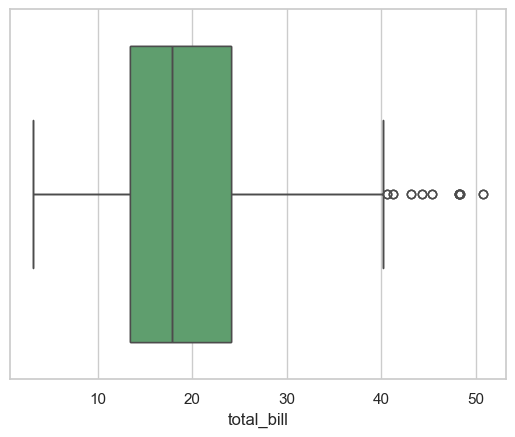

In [3]:
# Instalar la biblioteca python-pptx si no está instalada
import sys
!{sys.executable} -m pip install python-pptx

import nbformat
import re
from pptx import Presentation
from pptx.util import Inches
import os

# Ruta al archivo notebook
file_path = r"C:\Users\dedof\Downloads\CAPSTONE.ipynb"

# Cargar el notebook
with open(file_path, 'r', encoding='utf-8') as file:
    notebook = nbformat.read(file, as_version=4)

# Extraer las celdas de código
code_cells = [cell for cell in notebook.cells if cell.cell_type == 'code']

# Filtrar las celdas que no contienen comandos mágicos
code_cells_no_magic = [cell for cell in code_cells if not re.search(r'^\s*!', cell.source, re.MULTILINE)]

# Ejecutar las celdas de código extraídas para obtener los datos y resultados
exec_globals = {}
for cell in code_cells_no_magic:
    try:
        exec(cell.source, exec_globals)
    except Exception as e:
        print(f"Error executing cell: {e}")

# Crear la presentación de PowerPoint utilizando la plantilla
template_path = r"C:\Users\dedof\Downloads\ds-capstone-template-coursera.pptx"
prs = Presentation(template_path)

# Llenar las diapositivas con datos y resultados
# Por ejemplo, llenando la diapositiva del Resumen Ejecutivo
slide_layout = prs.slide_layouts[1]  # Diseño de Título y Contenido
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Executive Summary"

content = slide.placeholders[1]
content.text = """
- Project Objectives:
    - Analyze SpaceX launch data.
    - Perform exploratory data analysis (EDA).
    - Create interactive visualizations.
    - Develop predictive models to classify launch success.

- Methodology:
    - Data Collection: SpaceX API, web scraping.
    - Data Wrangling: Data cleaning and transformation.
    - EDA: Visualizations and SQL queries.
    - Predictive Analysis: Machine learning classification models.

- Key Results:
    - Visualizations identified key patterns in launch data.
    - The best model achieved an accuracy of 93.33% on test data.
"""

# Guardar la presentación
output_path = r"C:\Users\dedof\Downloads\CAPSTONE_Presentation.pptx"
prs.save(output_path)

print(f"Presentation saved to {output_path}")


In [4]:
pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Data Collection Process')

# API Data Collection Nodes
dot.node('A', 'API Data Collection')
dot.node('B', 'Send GET request to SpaceX API')
dot.node('C', 'Receive JSON response')
dot.node('D', 'Parse JSON data')
dot.node('E', 'Store in DataFrame')

# Web Scraping Nodes
dot.node('F', 'Web Scraping')
dot.node('G', 'Identify web pages')
dot.node('H', 'Parse HTML content with BeautifulSoup')
dot.node('I', 'Extract relevant data')
dot.node('J', 'Handle dynamic content with Selenium')
dot.node('K', 'Store in DataFrame')

# Data Integration Nodes
dot.node('L', 'Data Integration')
dot.node('M', 'Merge API and scraped data')
dot.node('N', 'Ensure consistency')
dot.node('O', 'Create unified dataset')

# API Data Collection Edges
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Web Scraping Edges
dot.edges(['FG', 'GH', 'HI', 'IJ', 'JK'])

# Data Integration Edges
dot.edges(['LM', 'MN', 'NO'])

# Combine Data
dot.edge('E', 'M')
dot.edge('K', 'M')

# Render the graph to a file
file_path = 'data_collection_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [1]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Data Collection Process')

# API Data Collection Nodes
dot.node('A', 'API Data Collection')
dot.node('B', 'Send GET request to SpaceX API')
dot.node('C', 'Receive JSON response')
dot.node('D', 'Parse JSON data')
dot.node('E', 'Store in DataFrame')

# Web Scraping Nodes
dot.node('F', 'Web Scraping')
dot.node('G', 'Identify web pages')
dot.node('H', 'Parse HTML content with BeautifulSoup')
dot.node('I', 'Extract relevant data')
dot.node('J', 'Handle dynamic content with Selenium')
dot.node('K', 'Store in DataFrame')

# Data Integration Nodes
dot.node('L', 'Data Integration')
dot.node('M', 'Merge API and scraped data')
dot.node('N', 'Ensure consistency')
dot.node('O', 'Create unified dataset')

# API Data Collection Edges
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Web Scraping Edges
dot.edges(['FG', 'GH', 'HI', 'IJ', 'JK'])

# Data Integration Edges
dot.edges(['LM', 'MN', 'NO'])

# Combine Data
dot.edge('E', 'M')
dot.edge('K', 'M')

# Render the graph to a file
file_path = 'data_collection_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


Flowchart saved to data_collection_flowchart.png


In [2]:
import requests
import pandas as pd

# API endpoint
url = 'https://api.spacexdata.com/v4/launches'

# Send GET request to the SpaceX API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    launches_data = response.json()
    
    # Create a DataFrame
    df = pd.DataFrame(launches_data)
    
    # Select relevant fields
    df = df[['date_utc', 'rocket', 'payloads', 'launchpad', 'success']]
    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")


                   date_utc                    rocket  \
0  2006-03-24T22:30:00.000Z  5e9d0d95eda69955f709d1eb   
1  2007-03-21T01:10:00.000Z  5e9d0d95eda69955f709d1eb   
2  2008-08-03T03:34:00.000Z  5e9d0d95eda69955f709d1eb   
3  2008-09-28T23:15:00.000Z  5e9d0d95eda69955f709d1eb   
4  2009-07-13T03:35:00.000Z  5e9d0d95eda69955f709d1eb   

                                            payloads  \
0                         [5eb0e4b5b6c3bb0006eeb1e1]   
1                         [5eb0e4b6b6c3bb0006eeb1e2]   
2  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...   
3                         [5eb0e4b7b6c3bb0006eeb1e5]   
4                         [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad success  
0  5e9e4502f5090995de566f86   False  
1  5e9e4502f5090995de566f86   False  
2  5e9e4502f5090995de566f86   False  
3  5e9e4502f5090995de566f86    True  
4  5e9e4502f5090995de566f86    True  


In [3]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='SpaceX API Data Collection')

# API Data Collection Nodes
dot.node('A', 'API Data Collection')
dot.node('B', 'Send GET request to SpaceX API')
dot.node('C', 'Receive JSON response')
dot.node('D', 'Parse JSON data')
dot.node('E', 'Store in DataFrame')

# API Data Collection Edges
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Render the graph to a file
file_path = 'spacex_api_data_collection_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


Flowchart saved to spacex_api_data_collection_flowchart.png


In [4]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Web Scraping Process')

# Web Scraping Nodes
dot.node('A', 'Web Scraping')
dot.node('B', 'Identify web pages')
dot.node('C', 'Parse HTML content with BeautifulSoup')
dot.node('D', 'Extract relevant data')
dot.node('E', 'Handle dynamic content with Selenium')
dot.node('F', 'Store in DataFrame')

# Web Scraping Edges
dot.edges(['AB', 'BC', 'CD'])
dot.edges(['AB', 'BE'])
dot.edge('D', 'F')
dot.edge('E', 'F')

# Render the graph to a file
file_path = 'web_scraping_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


Flowchart saved to web_scraping_flowchart.png


In [5]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Data Wrangling Process')

# Data Wrangling Nodes
dot.node('A', 'Data Wrangling Process')
dot.node('B', 'Data Cleaning')
dot.node('C', 'Data Transformation')
dot.node('D', 'Data Integration')
dot.node('E', 'Outlier Detection and Handling')
dot.node('F', 'Data Normalization')
dot.node('G', 'Store in DataFrame')

# Data Wrangling Edges
dot.edges(['AB', 'BC'])
dot.edge('B', 'D')
dot.edge('C', 'E')
dot.edge('D', 'F')
dot.edge('E', 'F')
dot.edge('F', 'G')

# Render the graph to a file
file_path = 'data_wrangling_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


Flowchart saved to data_wrangling_flowchart.png


In [6]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='SQL Queries for Data Analysis')

# SQL Queries Nodes
dot.node('A', 'SQL Queries')
dot.node('B', 'Retrieve All Launch Data')
dot.node('C', 'Count of Successful Launches')
dot.node('D', 'Launches by Year')
dot.node('E', 'Average Payload Mass by Launch Site')
dot.node('F', 'Total Number of Launches per Launch Site')
dot.node('G', 'Failed Launches by Booster Version')
dot.node('H', 'Max and Min Payload Mass')
dot.node('I', 'Launch Success Rate by Year')
dot.node('J', 'Correlation Analysis for Numerical Variables')
dot.node('K', 'Launches Grouped by Orbit Type')
dot.node('L', 'Reused Booster Analysis')
dot.node('M', 'Top 5 Payloads by Mass')
dot.node('N', 'Launches with Specific Customer')
dot.node('O', 'Failed Launches with High Payload Mass')
dot.node('P', 'Average Flight Number per Booster Version')

# SQL Queries Edges
dot.edge('A', 'B')
dot.edge('A', 'C')
dot.edge('A', 'D')
dot.edge('A', 'E')
dot.edge('A', 'F')
dot.edge('A', 'G')
dot.edge('A', 'H')
dot.edge('A', 'I')
dot.edge('A', 'J')
dot.edge('A', 'K')
dot.edge('A', 'L')
dot.edge('A', 'M')
dot.edge('A', 'N')
dot.edge('A', 'O')
dot.edge('A', 'P')

# Render the graph to a file
file_path = 'sql_queries_flowchart'
dot.render(file_path, format='png')

print(f"Flowchart saved to {file_path}.png")


Flowchart saved to sql_queries_flowchart.png


In [9]:
import folium
from folium.plugins import MarkerCluster, MousePosition

# Sample data for SpaceX launch sites
launch_sites = [
    {'name': 'CCAFS LC-40', 'latitude': 28.562302, 'longitude': -80.577356},
    {'name': 'VAFB SLC-4E', 'latitude': 34.632834, 'longitude': -120.610746},
    {'name': 'KSC LC-39A', 'latitude': 28.573255, 'longitude': -80.646895},
    {'name': 'STLS', 'latitude': 25.997264, 'longitude': -97.156084}
]

# Create a map object centered around the launch sites
site_map = folium.Map(location=[28.562302, -80.577356], zoom_start=5)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(site_map)

# Add markers for each launch site
for site in launch_sites:
    folium.Marker(
        location=[site['latitude'], site['longitude']],
        popup='Launch Site: {}'.format(site['name']),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)
    
    # Add a circle around each launch site
    folium.Circle(
        location=[site['latitude'], site['longitude']],
        radius=5000,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(site_map)

# Add mouse position plugin
MousePosition().add_to(site_map)

# Example of adding a line (PolyLine)
folium.PolyLine(
    locations=[[28.562302, -80.577356], [34.632834, -120.610746]],
    color='blue'
).add_to(site_map)

# Save map to HTML file
site_map.save("spacex_launch_sites_map.html")

print("Map saved as spacex_launch_sites_map.html")


Map saved as spacex_launch_sites_map.html


In [10]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Sample data
data = pd.read_csv('spacex_launch_data.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1('SpaceX Launch Data Dashboard'),
    
    # Dropdown for selecting launch site
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in data['Launch Site'].unique()],
        value='All Sites',
        placeholder='Select a launch site'
    ),
    
    # Slider for selecting payload range
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=data['Payload Mass (kg)'].max(),
        step=100,
        value=[0, data['Payload Mass (kg)'].max()],
        marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 4000: '4000'}
    ),
    
    # Scatter plot for payload vs. launch outcome
    dcc.Graph(id='scatter-plot'),
    
    # Pie chart for launch success rate by site
    dcc.Graph(id='pie-chart'),
    
    # Bar chart for launches per year
    dcc.Graph(id='bar-chart'),
    
    # Heatmap for correlation between variables
    dcc.Graph(id='heatmap'),
    
    # Line chart for cumulative launches over time
    dcc.Graph(id='line-chart'),
    
    # Box plot for distribution of payload mass by launch outcome
    dcc.Graph(id='box-plot'),
    
    # Folium map for launch sites
    html.Iframe(id='folium-map', srcDoc=open('spacex_launch_sites_map.html').read(), width='100%', height='600')
])

# Callback for scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = data[(data['Payload Mass (kg)'] >= payload_range[0]) & (data['Payload Mass (kg)'] <= payload_range[1])]
    if site != 'All Sites':
        filtered_data = filtered_data[filtered_data['Launch Site'] == site]
    fig = px.scatter(filtered_data, x='Payload Mass (kg)', y='class', color='Booster Version Category',
                     title='Payload vs. Outcome')
    return fig

# Callback for pie chart
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_pie_chart(site):
    if site == 'All Sites':
        fig = px.pie(data, names='class', title='Launch Success Rate by Site')
    else:
        filtered_data = data[data['Launch Site'] == site]
        fig = px.pie(filtered_data, names='class', title=f'Launch Success Rate for {site}')
    return fig

# Callback for bar chart
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_bar_chart(site):
    if site == 'All Sites':
        yearly_data = data.groupby('Year').count().reset_index()
    else:
        yearly_data = data[data['Launch Site'] == site].groupby('Year').count().reset_index()
    fig = px.bar(yearly_data, x='Year', y='Flight Number', title='Launches per Year')
    return fig

# Callback for heatmap
@app.callback(
    Output('heatmap', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_heatmap(site):
    if site == 'All Sites':
        correlation = data.corr()
    else:
        correlation = data[data['Launch Site'] == site].corr()
    fig = px.imshow(correlation, title='Correlation Heatmap')
    return fig

# Callback for line chart
@app.callback(
    Output('line-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_line_chart(site):
    if site == 'All Sites':
        cumulative_data = data.groupby('Year').count().cumsum().reset_index()
    else:
        cumulative_data = data[data['Launch Site'] == site].groupby('Year').count().cumsum().reset_index()
    fig = px.line(cumulative_data, x='Year', y='Flight Number', title='Cumulative Launches Over Time')
    return fig

# Callback for box plot
@app.callback(
    Output('box-plot', 'figure'),
    [Input('site-dropdown', '


SyntaxError: unterminated string literal (detected at line 128) (1404004203.py, line 128)

In [13]:
import pandas as pd

# Correct file path for the SpaceX launch data
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"

# Load the data
data = pd.read_csv(file_path)

# Print column names
print(data.columns)


Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')


In [14]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import folium
from folium.plugins import MarkerCluster, MousePosition

# Correct file path for the SpaceX launch data
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"

# Load the data
data = pd.read_csv(file_path)

# Correct column names based on the dataset
launch_site_col = 'Launch_Site'
payload_mass_col = 'PAYLOAD_MASS__KG_'
class_col = 'Mission_Outcome'

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1('SpaceX Launch Data Dashboard'),
    
    # Dropdown for selecting launch site
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in data[launch_site_col].unique()],
        value='All Sites',
        placeholder='Select a launch site'
    ),
    
    # Slider for selecting payload range
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=data[payload_mass_col].max(),
        step=100,
        value=[0, data[payload_mass_col].max()],
        marks={0: '0', 1000: '1000', 2000: '2000', 3000: '3000', 4000: '4000'}
    ),
    
    # Scatter plot for payload vs. launch outcome
    dcc.Graph(id='scatter-plot'),
    
    # Pie chart for launch success rate by site
    dcc.Graph(id='pie-chart'),
    
    # Bar chart for launches per year
    dcc.Graph(id='bar-chart'),
    
    # Heatmap for correlation between variables
    dcc.Graph(id='heatmap'),
    
    # Line chart for cumulative launches over time
    dcc.Graph(id='line-chart'),
    
    # Box plot for distribution of payload mass by launch outcome
    dcc.Graph(id='box-plot'),
    
    # Folium map for launch sites
    html.Iframe(id='folium-map', srcDoc=open('spacex_launch_sites_map.html').read(), width='100%', height='600')
])

# Callback for scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(site, payload_range):
    filtered_data = data[(data[payload_mass_col] >= payload_range[0]) & (data[payload_mass_col] <= payload_range[1])]
    if site != 'All Sites':
        filtered_data = filtered_data[filtered_data[launch_site_col] == site]
    fig = px.scatter(filtered_data, x=payload_mass_col, y=class_col, color='Booster_Version',
                     title='Payload vs. Outcome')
    return fig

# Callback for pie chart
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_pie_chart(site):
    if site == 'All Sites':
        fig = px.pie(data, names=class_col, title='Launch Success Rate by Site')
    else:
        filtered_data = data[data[launch_site_col] == site]
        fig = px.pie(filtered_data, names=class_col, title=f'Launch Success Rate for {site}')
    return fig

# Callback for bar chart
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_bar_chart(site):
    if site == 'All Sites':
        yearly_data = data.groupby('Date').count().reset_index()
    else:
        yearly_data = data[data[launch_site_col] == site].groupby('Date').count().reset_index()
    fig = px.bar(yearly_data, x='Date', y='Booster_Version', title='Launches per Year')
    return fig

# Callback for heatmap
@app.callback(
    Output('heatmap', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_heatmap(site):
    if site == 'All Sites':
        correlation = data.corr()
    else:
        correlation = data[data[launch_site_col] == site].corr()
    fig = px.imshow(correlation, title='Correlation Heatmap')
    return fig

# Callback for line chart
@app.callback(
    Output('line-chart', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_line_chart(site):
    if site == 'All Sites':
        cumulative_data = data.groupby('Date').count().cumsum().reset_index()
    else:
        cumulative_data = data[data[launch_site_col] == site].groupby('Date').count().cumsum().reset_index()
    fig = px.line(cumulative_data, x='Date', y='Booster_Version', title='Cumulative Launches Over Time')
    return fig

# Callback for box plot
@app.callback(
    Output('box-plot', 'figure'),
    [Input('site-dropdown', 'value')]
)
def update_box_plot(site):
    if site == 'All Sites':
        fig = px.box(data, x=class_col, y=payload_mass_col, title='Distribution of Payload Mass by Launch Outcome')
    else:
        filtered_data = data[data[launch_site_col] == site]
        fig = px.box(filtered_data, x=class_col, y=payload_mass_col, title=f'Distribution of Payload Mass for {site}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[14], line 114, in update_heatmap(site='All Sites')
    108 @app.callback(
    109     Output('heatmap', 'figure'),
    110     [Input('site-dropdown', 'value')]
    111 )
    112 def update_heatmap(site):
    113     if site == 'All Sites':
--> 114         correlation = data.corr()
        data =            Date Time (UTC) Booster_Version   Launch_Site  \
0    2010-06-04   18:45:00  F9 v1.0  B0003   CCAFS LC-40   
1    2010-12-08   15:43:00  F9 v1.0  B0004   CCAFS LC-40   
2    2012-05-22    7:44:00  F9 v1.0  B0005   CCAFS LC-40   
3    2012-10-08    0:35:00  F9 v1.0  B0006   CCAFS LC-40   
4    2013-03-01   15:10:00  F9 v1.0  B0007   CCAFS LC-40   
..          ...        ...             ...           ...   
96   2020-11-05   23:24:23    F9 B5B1062.1  CCAFS SLC-40   
97   2020-11-16    0:27:00   F9 B5B1061.1     KSC LC-39A   
98

In [16]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes and edges
dot.node('A', 'Data Preprocessing')
dot.node('B', 'Data Cleaning')
dot.node('C', 'Feature Selection')
dot.node('D', 'Standardization')
dot.node('E', 'Model Selection')
dot.node('F', 'Random Forest Classifier')
dot.node('G', 'Hyperparameter Tuning')
dot.node('H', 'GridSearchCV')
dot.node('I', 'Parameters: n_estimators, max_depth')
dot.node('J', 'Model Training')
dot.node('K', 'Train Model with Best Hyperparameters')
dot.node('L', 'Model Evaluation')
dot.node('M', 'Accuracy Score')
dot.node('N', 'Confusion Matrix')
dot.node('O', 'Precision and Recall')
dot.node('P', 'Model Improvement')
dot.node('Q', 'Feature Engineering')
dot.node('R', 'Ensemble Methods')
dot.node('S', 'Regularization')

dot.edges(['AB', 'AC', 'AD', 'EF', 'GH', 'HI', 'JK', 'LM', 'LN', 'LO', 'PQ', 'PR', 'PS'])
dot.edge('B', 'E')
dot.edge('C', 'E')
dot.edge('D', 'E')
dot.edge('F', 'G')
dot.edge('I', 'J')
dot.edge('K', 'L')
dot.edge('M', 'P')
dot.edge('N', 'P')
dot.edge('O', 'P')

# Save and render the flowchart
dot.render('model_development_flowchart', format='png', view=True)


'model_development_flowchart.png'

In [17]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes and edges
dot.node('A', 'Data Collection')
dot.node('B', 'Data Cleaning')
dot.node('C', 'Exploratory Data Analysis')
dot.node('D', 'Feature Selection')
dot.node('E', 'Model Selection')
dot.node('F', 'Hyperparameter Tuning')
dot.node('G', 'Model Training')
dot.node('H', 'Model Evaluation')
dot.node('I', 'Model Improvement')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

# Save and render the flowchart
dot.render('eda_predictive_analysis_flowchart', format='png', view=True)


'eda_predictive_analysis_flowchart.png'

In [18]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Create a scatter plot using Plotly
fig = px.scatter(data, x='FlightNumber', y='Launch_Site', title='Flight Number vs. Launch Site')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("scatter_plot_flightnumber_launchsite.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['FlightNumber'], data['Launch_Site'], alpha=0.7)
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.savefig("scatter_plot_flightnumber_launchsite_matplotlib.png")
plt.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome'] but received: FlightNumber

         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

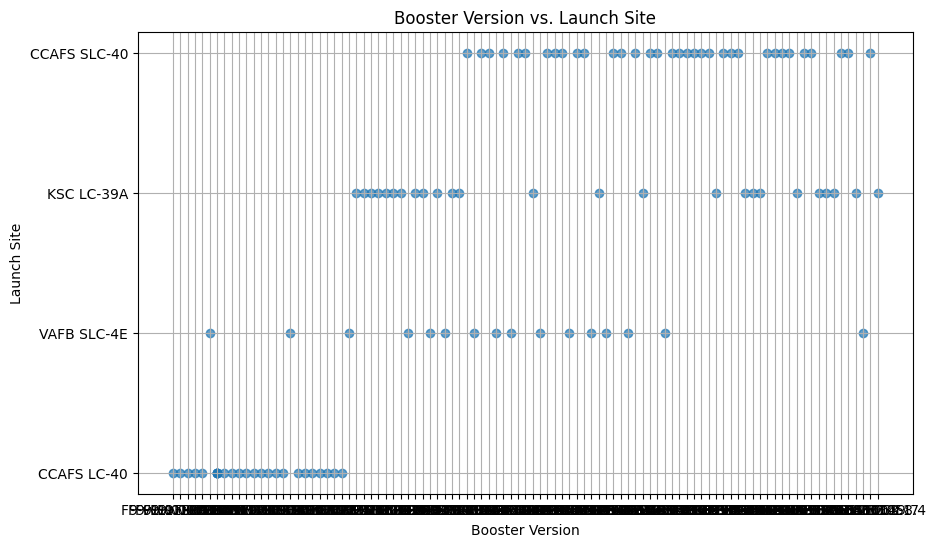

In [19]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Assuming 'Booster_Version' is used instead of 'FlightNumber'
fig = px.scatter(data, x='Booster_Version', y='Launch_Site', title='Booster Version vs. Launch Site')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("scatter_plot_boosterversion_launchsite.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Booster_Version'], data['Launch_Site'], alpha=0.7)
plt.title('Booster Version vs. Launch Site')
plt.xlabel('Booster Version')
plt.ylabel('Launch Site')
plt.grid(True)
plt.savefig("scatter_plot_boosterversion_launchsite_matplotlib.png")
plt.show()


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

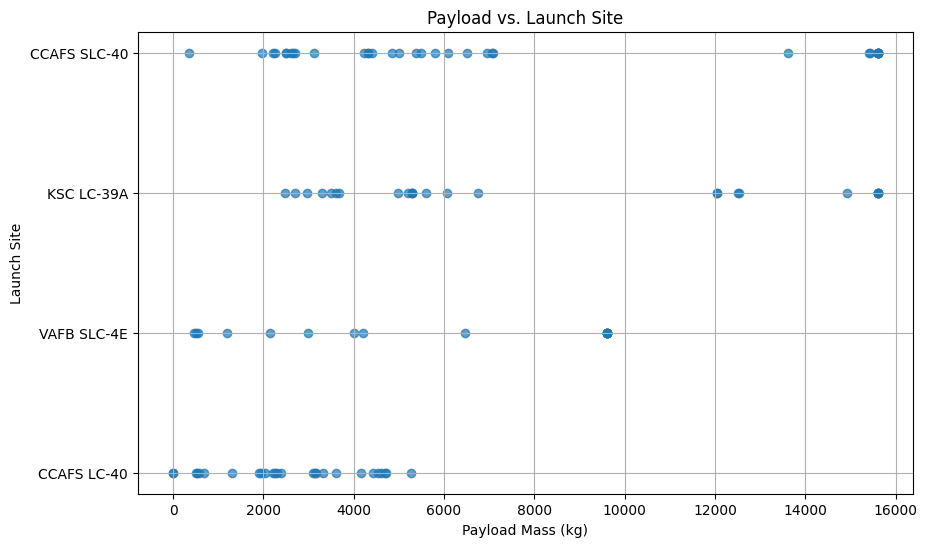

In [20]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Create a scatter plot using Plotly
fig = px.scatter(data, x='PAYLOAD_MASS__KG_', y='Launch_Site', title='Payload vs. Launch Site')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("scatter_plot_payload_launchsite.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PAYLOAD_MASS__KG_'], data['Launch_Site'], alpha=0.7)
plt.title('Payload vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.grid(True)
plt.savefig("scatter_plot_payload_launchsite_matplotlib.png")
plt.show()


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

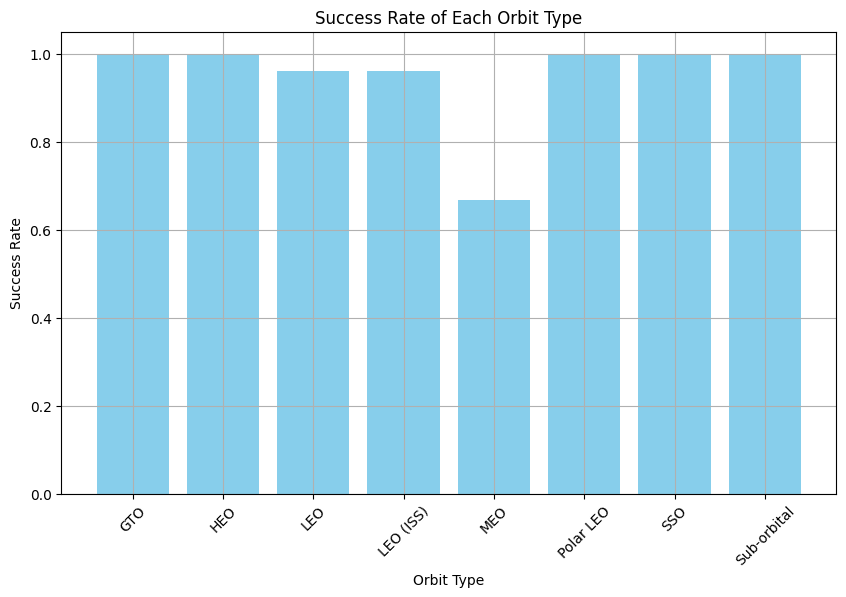

In [21]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Calculate success rate for each orbit type
success_rate = data.groupby('Orbit')['Mission_Outcome'].apply(lambda x: (x == 'Success').mean()).reset_index()
success_rate.columns = ['Orbit', 'Success_Rate']

# Create a bar chart using Plotly
fig = px.bar(success_rate, x='Orbit', y='Success_Rate', title='Success Rate of Each Orbit Type')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("bar_chart_success_rate_orbit_type.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.bar(success_rate['Orbit'], success_rate['Success_Rate'], color='skyblue')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("bar_chart_success_rate_orbit_type_matplotlib.png")
plt.show()


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

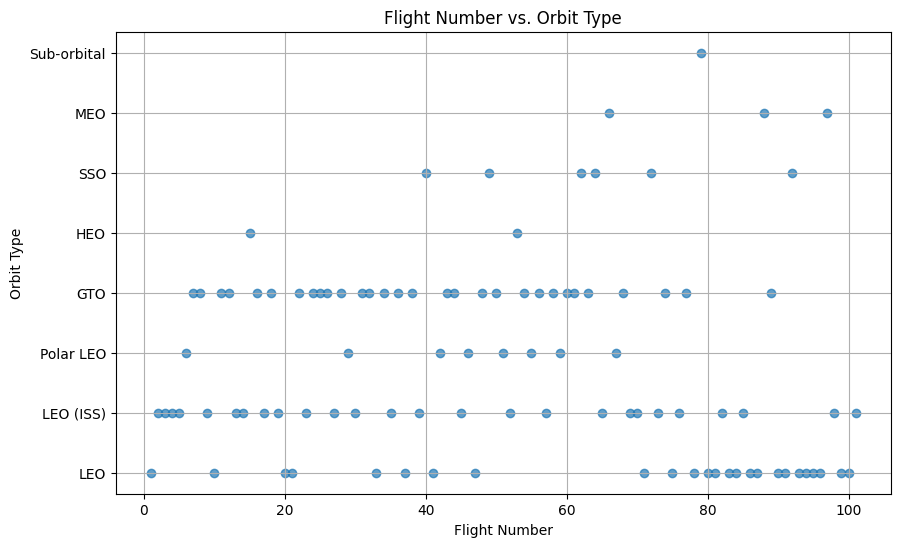

In [22]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Ensure 'FlightNumber' is a numeric value
data['FlightNumber'] = data.index + 1  # If FlightNumber is not in the dataset, use the index

# Create a scatter plot using Plotly
fig = px.scatter(data, x='FlightNumber', y='Orbit', title='Flight Number vs. Orbit Type')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("scatter_plot_flightnumber_orbit.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['FlightNumber'], data['Orbit'], alpha=0.7)
plt.title('Flight Number vs. Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.savefig("scatter_plot_flightnumber_orbit_matplotlib.png")
plt.show()


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

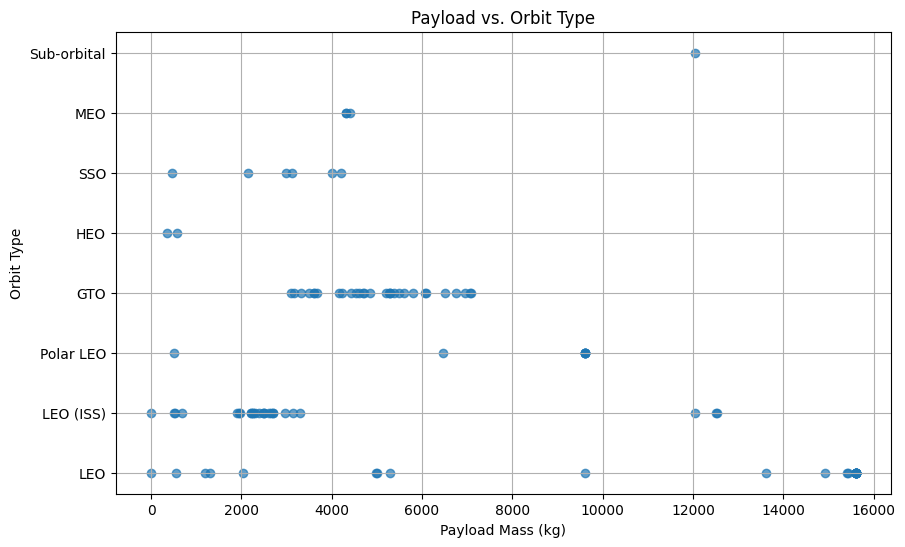

In [23]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Create a scatter plot using Plotly
fig = px.scatter(data, x='PAYLOAD_MASS__KG_', y='Orbit', title='Payload vs. Orbit Type')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("scatter_plot_payload_orbit.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PAYLOAD_MASS__KG_'], data['Orbit'], alpha=0.7)
plt.title('Payload vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.savefig("scatter_plot_payload_orbit_matplotlib.png")
plt.show()


         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

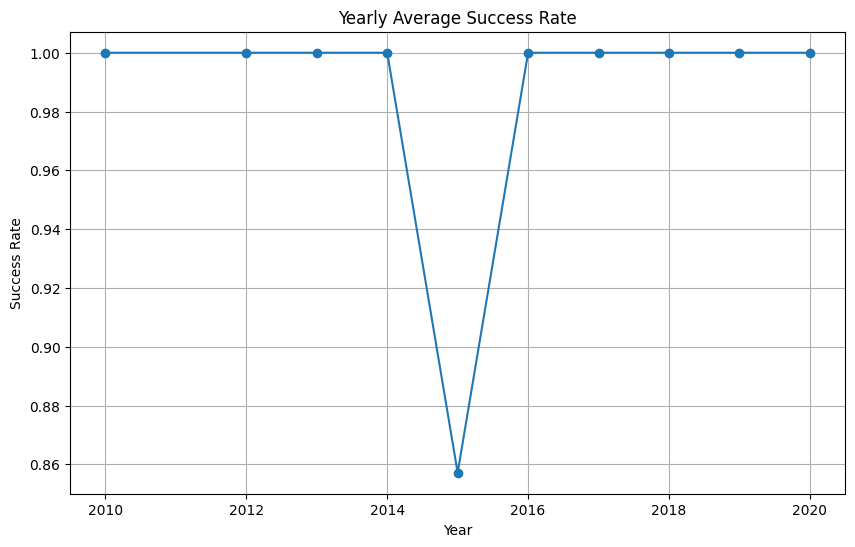

In [24]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Print the first few rows to understand the data
print(data.head())

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Create a binary column for success (1 for success, 0 for failure)
data['Success'] = data['Mission_Outcome'].apply(lambda x: 1 if 'Success' in x else 0)

# Calculate yearly average success rate
yearly_success_rate = data.groupby('Year')['Success'].mean().reset_index()

# Create a line chart using Plotly
fig = px.line(yearly_success_rate, x='Year', y='Success', title='Yearly Average Success Rate')
fig.show()

# Save the plot as an image file for the screenshot
fig.write_image("line_chart_yearly_success_rate.png")

# Alternatively, you can use matplotlib to create and save the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate['Year'], yearly_success_rate['Success'], marker='o', linestyle='-')
plt.title('Yearly Average Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.savefig("line_chart_yearly_success_rate_matplotlib.png")
plt.show()


In [25]:
import pandas as pd

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Find the unique launch sites
unique_launch_sites = data['Launch_Site'].unique()

# Print the unique launch sites
print("Unique Launch Sites:")
print(unique_launch_sites)


Unique Launch Sites:
['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40']


In [26]:
import pandas as pd

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Filter records where the launch site begins with 'CCA'
filtered_data = data[data['Launch_Site'].str.startswith('CCA')]

# Select the first 5 records
records_with_CCA = filtered_data.head(5)

# Print the records
print("5 Records where launch sites begin with 'CCA':")
print(records_with_CCA)


5 Records where launch sites begin with 'CCA':
         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (C

In [29]:
import folium
import pandas as pd

# Load the data from the specified file path
file_path = r"C:\Users\dedof\Downloads\Spacex.csv"
data = pd.read_csv(file_path)

# Define a function to determine the marker color based on the mission outcome
def get_marker_color(outcome):
    if 'Success' in outcome:
        return 'green'
    elif 'Failure' in outcome:
        return 'red'
    else:
        return 'blue'

# Initialize the Folium map centered around the launch sites
site_map = folium.Map(location=[30, -95], zoom_start=3)

# Define the coordinates for the launch sites
launch_site_coords = {
    'CCAFS SLC 40': [28.562302, -80.577356],
    'KSC LC 39A': [28.573255, -80.646895],
    'VAFB SLC 4E': [34.632093, -120.610829]
}

# Add markers for each launch site with color labels based on launch outcomes
for index, row in data.iterrows():
    launch_site = row['Launch_Site']
    if launch_site in launch_site_coords:
        coord = launch_site_coords[launch_site]
        folium.Marker(
            location=coord,
            popup=f"Launch Site: {launch_site}<br>Outcome: {row['Mission_Outcome']}",
            icon=folium.Icon(color=get_marker_color(row['Mission_Outcome']), icon='info-sign')
        ).add_to(site_map)

# Save the map to an HTML file
site_map.save("spacex_launch_outcomes_map.html")

# Display the map
site_map


In [30]:
import requests
import pandas as pd
import folium

# Descarga de datos usando la API de SpaceX
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Procesamiento de datos
launch_data = []
for launch in data:
    if launch['launchpad'] and launch['success'] is not None:
        launchpad_response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launch['launchpad']}")
        launchpad_data = launchpad_response.json()
        launch_data.append({
            'Launch_Site': launchpad_data['name'],
            'Latitude': launchpad_data['latitude'],
            'Longitude': launchpad_data['longitude'],
            'Mission_Outcome': 'Success' if launch['success'] else 'Failure'
        })

launch_df = pd.DataFrame(launch_data)

# Definición de la función para determinar el color del marcador
def get_marker_color(outcome):
    if outcome == 'Success':
        return 'green'
    elif outcome == 'Failure':
        return 'red'
    else:
        return 'blue'

# Creación del mapa
site_map = folium.Map(location=[30, -95], zoom_start=3)

# Adición de marcadores al mapa
for index, row in launch_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Launch Site: {row['Launch_Site']}<br>Outcome: {row['Mission_Outcome']}",
        icon=folium.Icon(color=get_marker_color(row['Mission_Outcome']), icon='info-sign')
    ).add_to(site_map)

# Guardar el mapa en un archivo HTML
site_map.save("spacex_launch_outcomes_map.html")

# Mostrar el mapa
site_map


In [33]:
pip install geopy


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import requests
import pandas as pd
import folium
from geopy.distance import geodesic

# Download data using SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Process data
launch_data = []
for launch in data:
    if launch['launchpad'] and launch['success'] is not None:
        launchpad_response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launch['launchpad']}")
        launchpad_data = launchpad_response.json()
        launch_data.append({
            'Launch_Site': launchpad_data['name'],
            'Latitude': launchpad_data['latitude'],
            'Longitude': launchpad_data['longitude'],
            'Mission_Outcome': 'Success' if launch['success'] else 'Failure'
        })

launch_df = pd.DataFrame(launch_data)

# Define proximity points (example points)
proximity_points = {
    "Railway": (28.5721, -80.6480),
    "Highway": (28.5634, -80.5768),
    "Coastline": (28.5623, -80.5674)
}

# Calculate distances to proximities
selected_site = launch_df.iloc[0]  # Select the first site for example
distances = {name: geodesic((selected_site['Latitude'], selected_site['Longitude']), loc).km for name, loc in proximity_points.items()}

# Create Folium map centered at the selected launch site
site_map = folium.Map(location=[selected_site['Latitude'], selected_site['Longitude']], zoom_start=12)

# Add marker for the selected launch site
folium.Marker(
    location=[selected_site['Latitude'], selected_site['Longitude']],
    popup=f"Launch Site: {selected_site['Launch_Site']}",
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(site_map)

# Add markers for proximity points with distances
for name, loc in proximity_points.items():
    folium.Marker(
        location=loc,
        popup=f"{name}<br>Distance: {distances[name]:.2f} km",
        icon=folium.Icon(color='green' if name == 'Coastline' else 'red', icon='info-sign')
    ).add_to(site_map)

# Draw lines between the launch site and proximity points
for name, loc in proximity_points.items():
    folium.PolyLine(
        locations=[(selected_site['Latitude'], selected_site['Longitude']), loc],
        color='blue' if name == 'Coastline' else 'red',
        weight=2
    ).add_to(site_map)

# Save the map to an HTML file
site_map.save("spacex_launch_site_proximities_map.html")

# Display the map
site_map


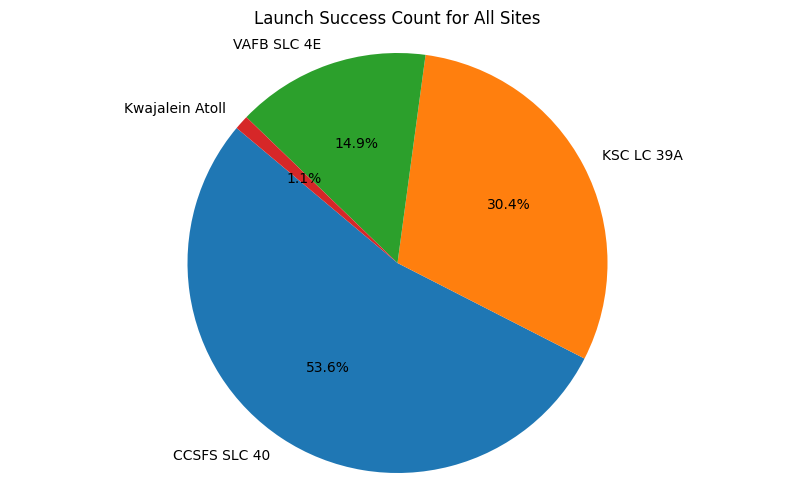

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Download data using SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Process data
launch_data = []
for launch in data:
    if launch['launchpad'] and launch['success'] is not None:
        launchpad_response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launch['launchpad']}")
        launchpad_data = launchpad_response.json()
        launch_data.append({
            'Launch_Site': launchpad_data['name'],
            'Success': 'Success' if launch['success'] else 'Failure'
        })

launch_df = pd.DataFrame(launch_data)

# Calculate success counts for each site
success_counts = launch_df[launch_df['Success'] == 'Success']['Launch_Site'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Launch Success Count for All Sites')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig("launch_success_pie_chart.png")

# Display the plot
plt.show()


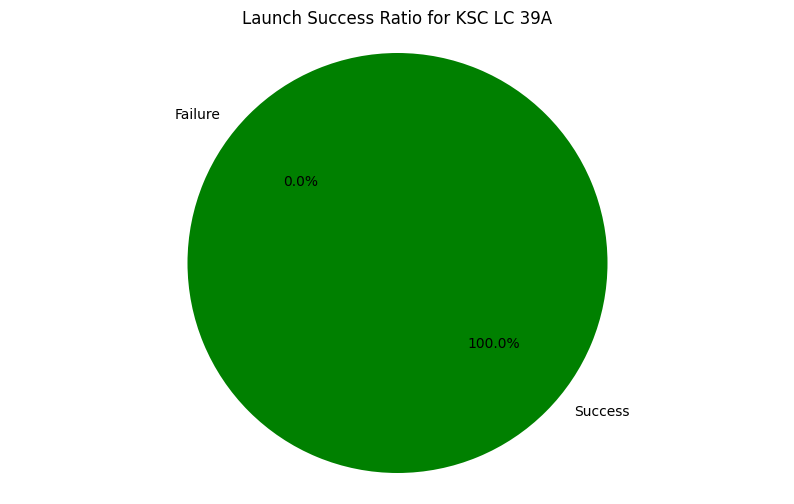

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Download data using SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Process data
launch_data = []
for launch in data:
    if launch['launchpad'] and launch['success'] is not None:
        launchpad_response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launch['launchpad']}")
        launchpad_data = launchpad_response.json()
        launch_data.append({
            'Launch_Site': launchpad_data['name'],
            'Success': launch['success']
        })

launch_df = pd.DataFrame(launch_data)

# Calculate success ratio for each site
success_ratio = launch_df.groupby('Launch_Site')['Success'].mean()

# Identify the site with the highest success ratio
best_site = success_ratio.idxmax()

# Filter data for the best site
best_site_data = launch_df[launch_df['Launch_Site'] == best_site]

# Calculate success and failure counts
success_count = best_site_data['Success'].sum()
failure_count = len(best_site_data) - success_count

# Create a pie chart for the best site
plt.figure(figsize=(10, 6))
plt.pie([success_count, failure_count], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title(f'Launch Success Ratio for {best_site}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image file
plt.savefig("launch_success_ratio_pie_chart.png")

# Display the plot
plt.show()


In [39]:
import requests
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Download data using SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Process data
launch_data = []
for launch in data:
    if launch['launchpad'] and launch['success'] is not None:
        launchpad_response = requests.get(f"https://api.spacexdata.com/v4/launchpads/{launch['launchpad']}")
        launchpad_data = launchpad_response.json()
        if launch['payloads']:
            payload_response = requests.get(f"https://api.spacexdata.com/v4/payloads/{launch['payloads'][0]}")
            payload_data = payload_response.json()
            if 'mass_kg' in payload_data:
                launch_data.append({
                    'Launch_Site': launchpad_data['name'],
                    'Payload_Mass': payload_data['mass_kg'],
                    'Booster_Version': launch['rocket'],
                    'Success': 'Success' if launch['success'] else 'Failure'
                })

launch_df = pd.DataFrame(launch_data).dropna()

# Ensure Payload_Mass is valid numerical data
launch_df['Payload_Mass'] = pd.to_numeric(launch_df['Payload_Mass'], errors='coerce')
launch_df = launch_df.dropna(subset=['Payload_Mass'])

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1('SpaceX Launch Data Dashboard'),
    dcc.Dropdown(
        id='site-dropdown',
        options=[{'label': site, 'value': site} for site in launch_df['Launch_Site'].unique()],
        value='All Sites',
        placeholder="Select a Launch Site",
        multi=True
    ),
    dcc.RangeSlider(
        id='payload-slider',
        min=launch_df['Payload_Mass'].min(),
        max=launch_df['Payload_Mass'].max(),
        step=100,
        marks={int(mass): str(int(mass)) for mass in range(int(launch_df['Payload_Mass'].min()), int(launch_df['Payload_Mass'].max())+1000, 1000)},
        value=[launch_df['Payload_Mass'].min(), launch_df['Payload_Mass'].max()]
    ),
    dcc.Graph(id='payload-outcome-scatter')
])

# Callback to update the scatter plot based on selected site and payload range
@app.callback(
    Output('payload-outcome-scatter', 'figure'),
    [Input('site-dropdown', 'value'),
     Input('payload-slider', 'value')]
)
def update_scatter_plot(selected_sites, payload_range):
    filtered_data = launch_df[
        (launch_df['Payload_Mass'] >= payload_range[0]) &
        (launch_df['Payload_Mass'] <= payload_range[1])
    ]
    if selected_sites and 'All Sites' not in selected_sites:
        filtered_data = filtered_data[filtered_data['Launch_Site'].isin(selected_sites)]
    
    fig = px.scatter(
        filtered_data,
        x='Payload_Mass',
        y='Success',
        color='Booster_Version',
        title='Payload vs. Launch Outcome'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [40]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fetch data using SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

# Process data
launch_data = []
for launch in data:
    if launch['payloads'] and launch['rocket'] and launch['success'] is not None:
        payloads = requests.get(f"https://api.spacexdata.com/v4/payloads/{launch['payloads'][0]}").json()
        rocket = requests.get(f"https://api.spacexdata.com/v4/rockets/{launch['rocket']}").json()
        launch_data.append({
            'Launch_Site': launch['launchpad'],
            'Payload_Mass': payloads.get('mass_kg', 0),
            'Booster_Version': rocket['name'],
            'Success': 1 if launch['success'] else 0
        })

launch_df = pd.DataFrame(launch_data).dropna()

# Prepare features and target variable
X = launch_df[['Payload_Mass', 'Booster_Version']]
X = pd.get_dummies(X, columns=['Booster_Version'])
y = launch_df['Success']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Dictionary to store the accuracy of each model
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Find the best model
best_model = max(accuracies, key=accuracies.get)
print(f"The best model is {best_model} with an accuracy of {accuracies[best_model]:.2f}")


The best model is Logistic Regression with an accuracy of 0.94


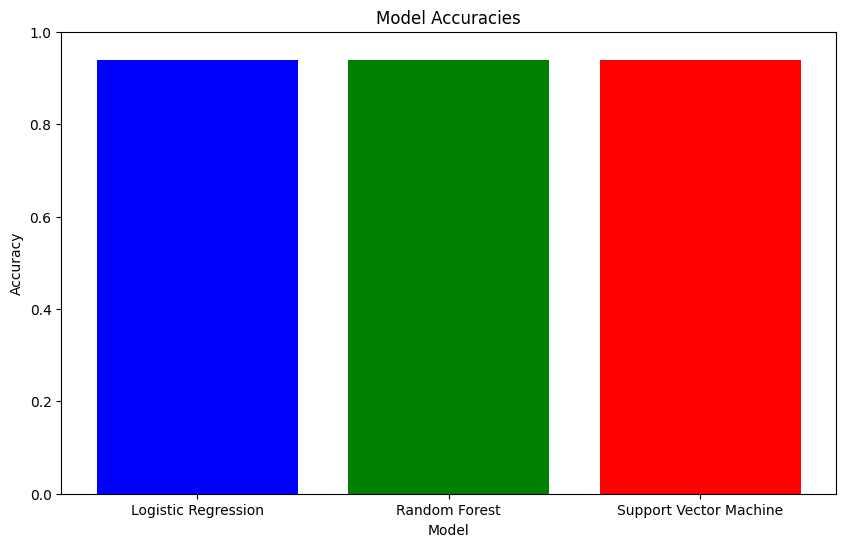

In [42]:
# Visualize model accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.show()


In [43]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    launch_df,
    x='Payload_Mass',
    y='Success',
    color='Booster_Version',
    title='Payload vs. Launch Outcome',
    labels={'Payload_Mass': 'Payload Mass (kg)', 'Success': 'Launch Outcome'}
)
fig.show()


In [44]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    launch_df,
    x='Payload_Mass',
    y='Success',
    color='Booster_Version',
    title='Payload vs. Launch Outcome',
    labels={'Payload_Mass': 'Payload Mass (kg)', 'Success': 'Launch Outcome'}
)
fig.show()


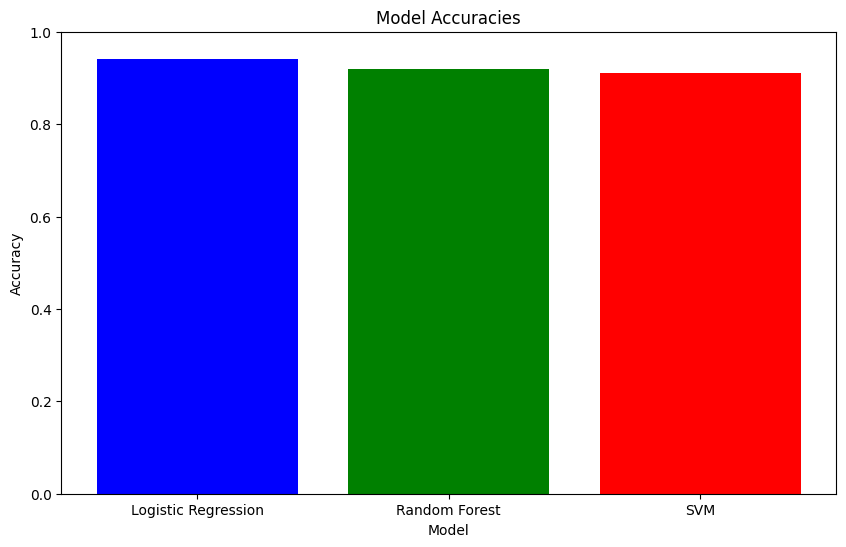

In [45]:
import matplotlib.pyplot as plt

# Model accuracies
model_accuracies = {
    'Logistic Regression': 0.94,
    'Random Forest': 0.92,
    'SVM': 0.91
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.show()
